# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Defining Style

In [2]:
sns.set_theme(style = 'whitegrid', palette = 'colorblind')

# Loading the Data

In [3]:
salaries_df = pd.read_csv('DataScience_salaries_2024.csv')
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [4]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


# Analysis

This data Analysis has the motivation to answer some questions:

<b> 1 - </b> Beetween each data scientist job, which one has the highest salary for each experience level?<br>
<b> 2 - </b> What's the best country to work as Jr. Data Scientist? <br>
<b> 3 - </b> 

## 1 - Beetween each data scientist job, which one has the highest salary for each experience level?

### Selecting, grouping and cleaning the data

First thing that we need to do to answer this question is to group our dataset by experience level and job title

In [5]:
'''
experience_df = pd.crosstab(index = salaries_df.job_title, columns = salaries_df.experience_level, values = salaries_df.salary_in_usd, aggfunc = 'mean')
experience_df
'''

experience_df = salaries_df[['experience_level', 'job_title', 'salary_in_usd']].copy()
experience_df = experience_df.groupby(['job_title', 'experience_level'])[['salary_in_usd']].mean()
experience_df.reset_index(inplace = True, level = 0)
experience_df = experience_df[experience_df['job_title'].str.contains('Data Scientist', case = False)]
experience_df

,job_title,salary_in_usd
experience_level,,
EN,Applied Data Scientist,51945.600000
MI,Applied Data Scientist,77977.750000
SE,Applied Data Scientist,172354.000000
EN,Data Scientist,87028.373134
EX,Data Scientist,182440.756757
MI,Data Scientist,124480.467236
SE,Data Scientist,167625.925303
MI,Data Scientist Lead,89306.000000
SE,Data Scientist Lead,183000.000000


### Generating the plot

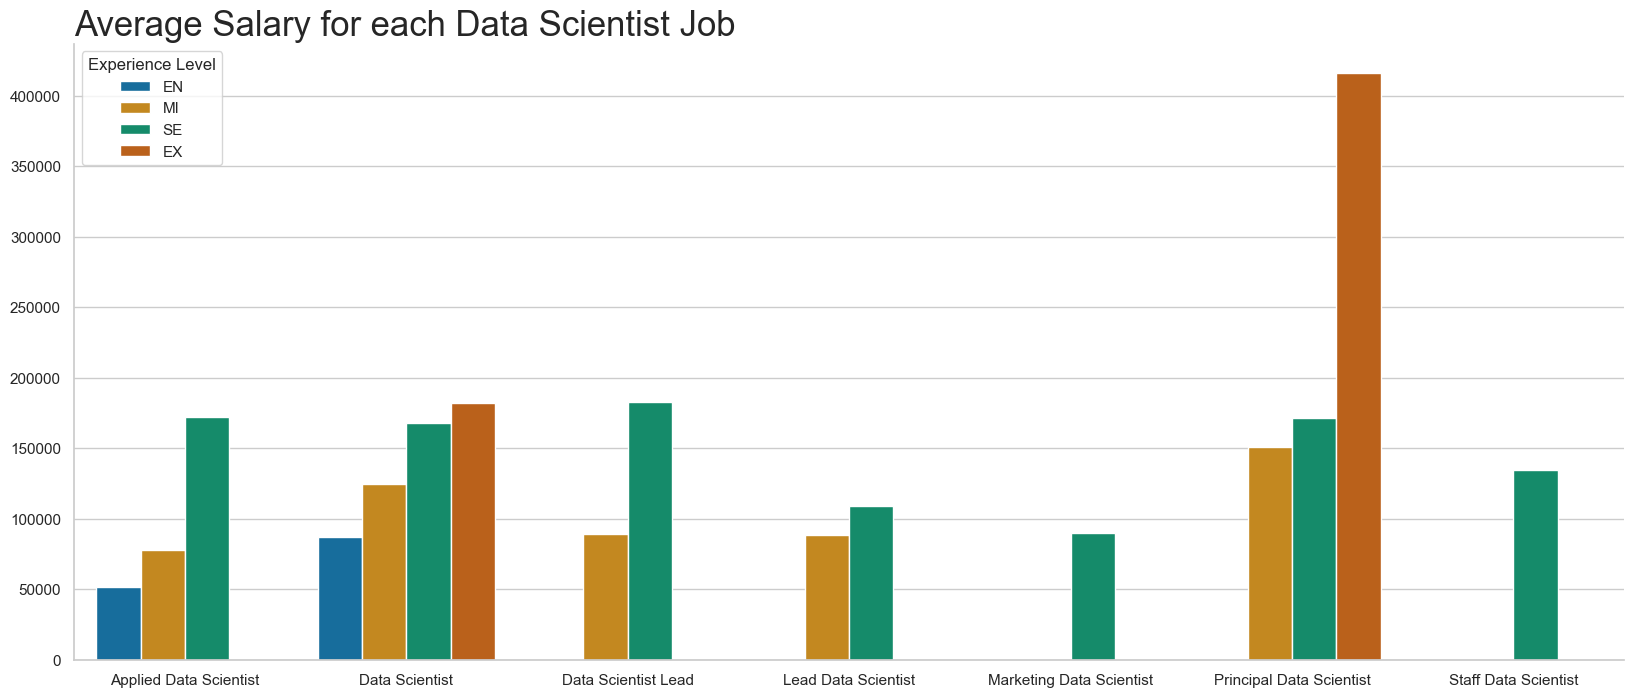

In [13]:
fig, ax = plt.subplots(figsize= (20,8))

ax = sns.barplot(experience_df, x = 'job_title', y = 'salary_in_usd', hue = experience_df.index)

ax.set_title('Average Salary for each Data Scientist Job', loc = 'left', fontsize = 25)
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title = 'Experience Level')

sns.despine()

plt.show()

Looking at the chart above we can conclude that:<br><br>
1- For entry level jobs, the 'Data Scientist' has the bigger mean salary of them all;<br>
2- When we are talking abou mid level, and expert jobs, 'Principle Data Scientist' has the highest payment mean;<br>
3- To end this question we can see that forn Seniors, the 'Data Scientist Lead' is the best paid salary.